# 1 Modelling the external data
## Case c) Thermal emission only, free ellipsoidal variation

**Author:** Hannu Parviainen<br>
**Last edited:** 21.11.2021

Here we model the KELT-1 light curves observed with TESS (Beatty20, XX20), LBT (Beatty), and Spitzer (Beatty2019, Beatty2017) using a full phase curve model that includes the transit, secondary eclipse, thermal emission, reflection, ellipsoidal variations and Doppler boosting. 

The model is implemented by `src.priordatalpf.JointLPF`, which inherits all its functionality from `pytransit.lpf.PhaseCurveLPF`.

In this base case we don't constrain the geometric albedo or the planet's day-side flux ratio (we do this in the later cases). These two parameters should be linearly correlated since they are the main parameters affecting the eclipse depth, but it is useful to see their joint posterior.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from corner import corner
from src import JointLPF
from src.kelt1 import read_mcmc

In [3]:
lpf = JointLPF('c')

Global optimisation:   0%|          | 0/1 [00:00<?, ?it/s]

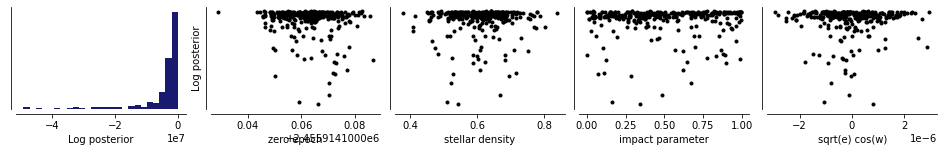

In [4]:
lpf.optimize_global(1, 300)

In [5]:
df = read_mcmc('results/01a_ext_emission_and theoretical_ev.nc')
sids = permutation(df.values.shape[0])[:lpf.de.n_pop]
starting_population = df.values[sids, :-1].copy()

In [6]:
lpf.sample_mcmc(500, thin=10, repeats=1, save=True, population=starting_population)

MCMC sampling:   0%|          | 0/1 [00:00<?, ?it/s]

Run 1/1:   0%|          | 0/500 [00:00<?, ?it/s]

In [8]:
lpf.sample_mcmc(5000, thin=50, repeats=8, save=True)

MCMC sampling:   0%|          | 0/8 [00:00<?, ?it/s]

Run 1/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 2/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 3/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 4/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 5/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 6/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 7/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 8/8:   0%|          | 0/5000 [00:00<?, ?it/s]

In [9]:
df = lpf.posterior_samples(derived_parameters=False)

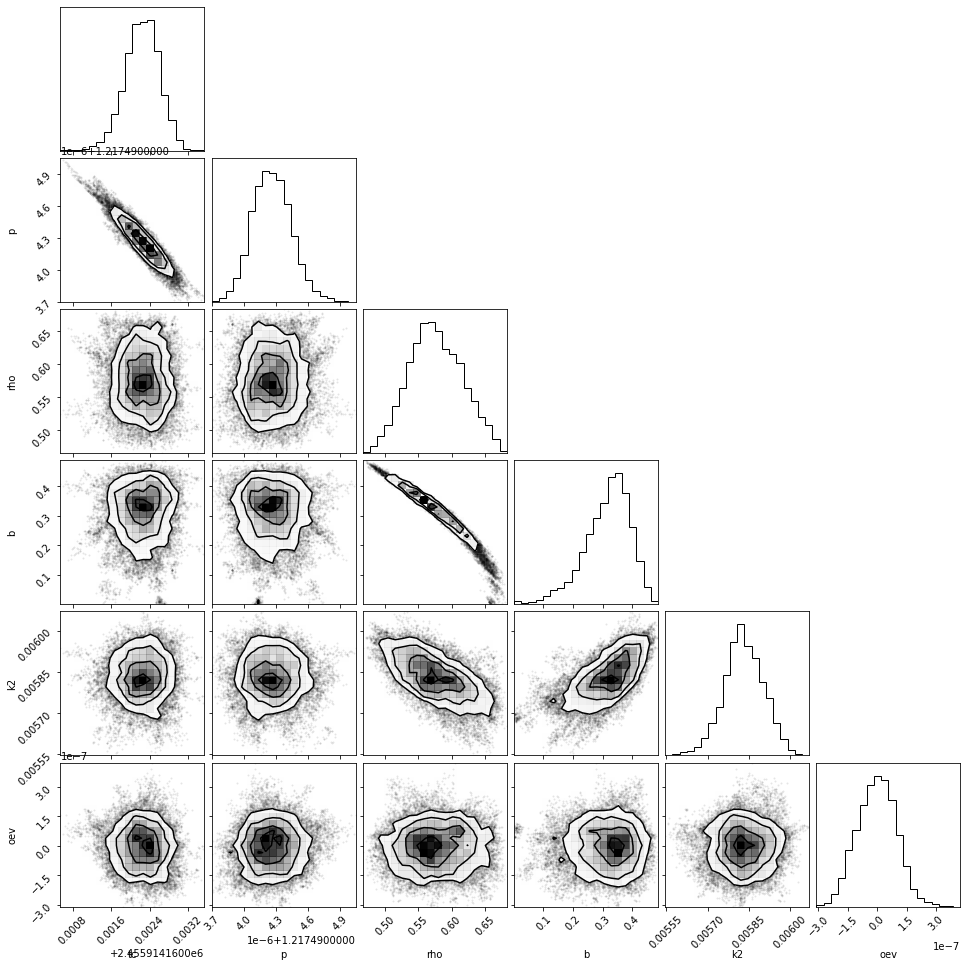

In [10]:
corner(df.iloc[:,[0,1,2,3,6,7]]);

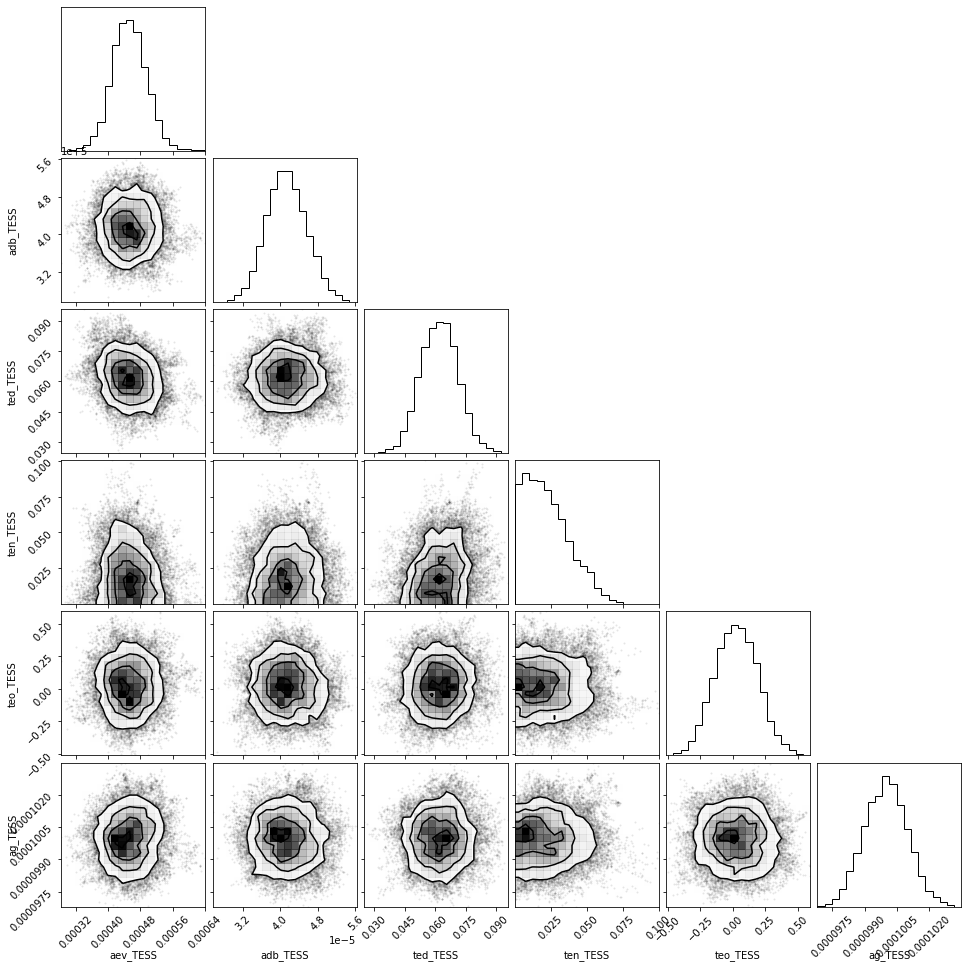

In [11]:
corner(df.iloc[:,8:14]);

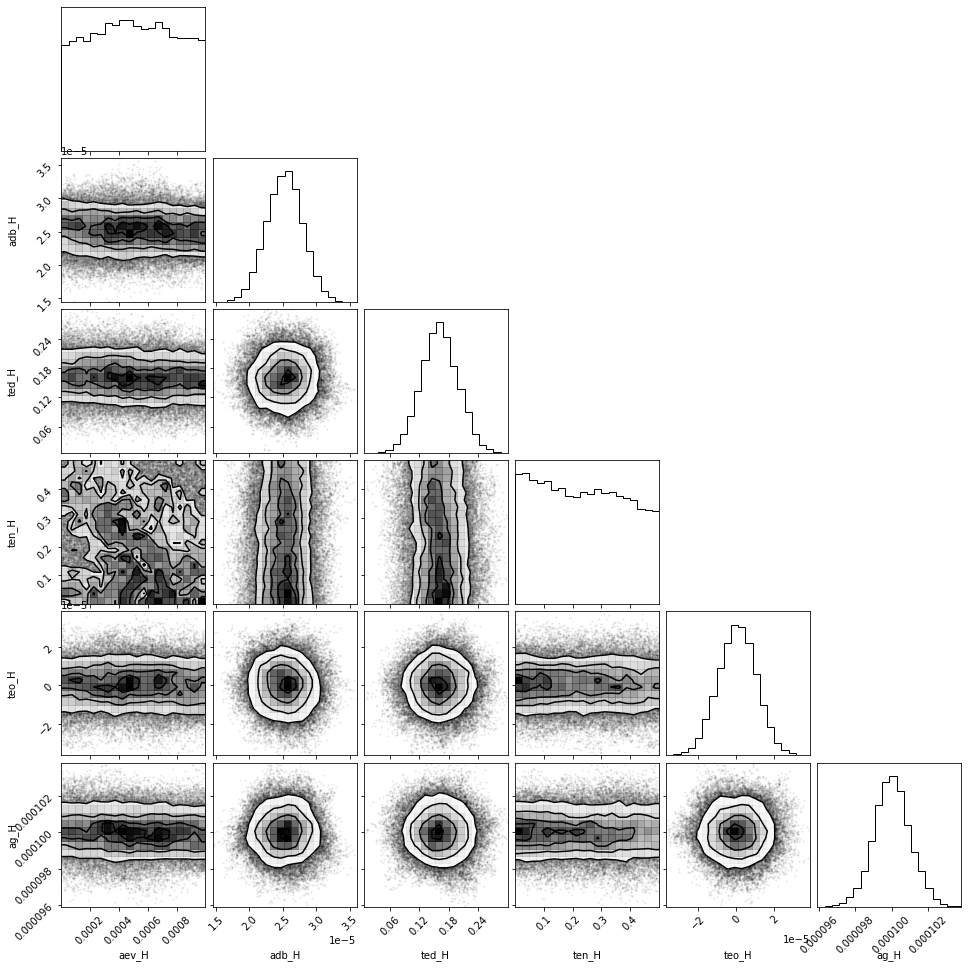

In [14]:
corner(df.iloc[:,14:20]);

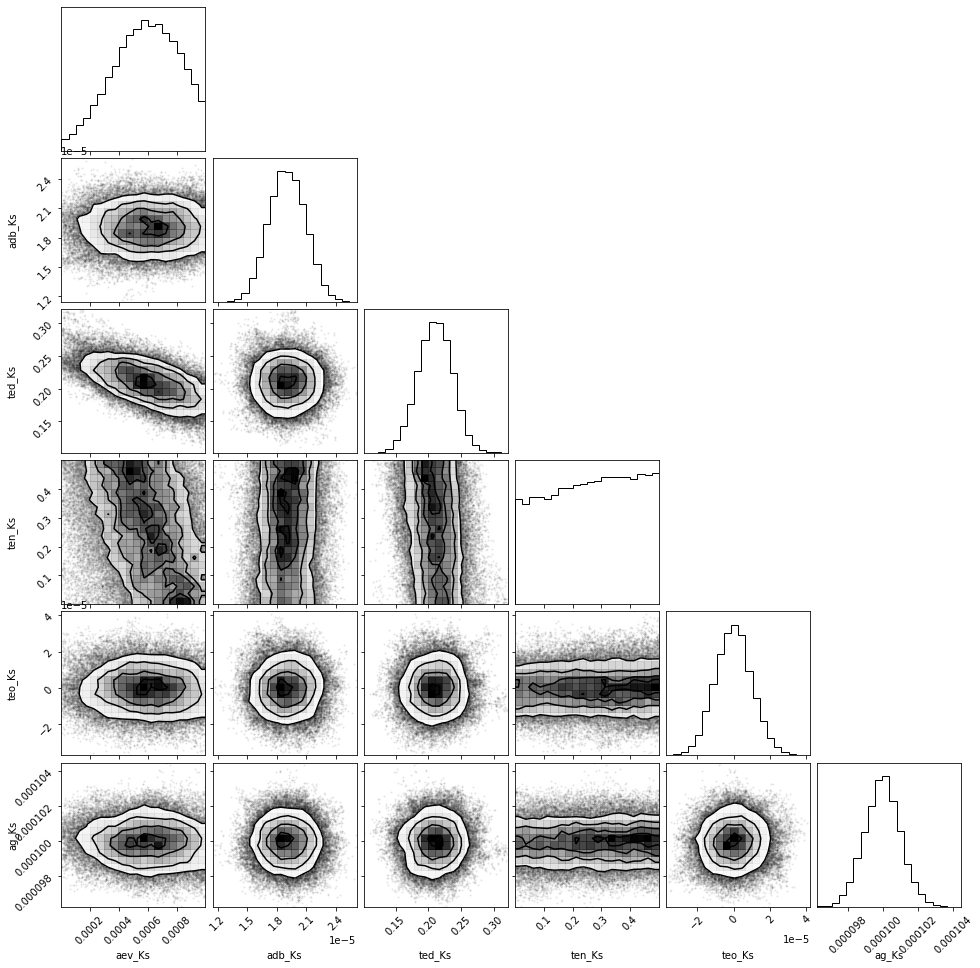

In [15]:
corner(df.iloc[:,20:26]);

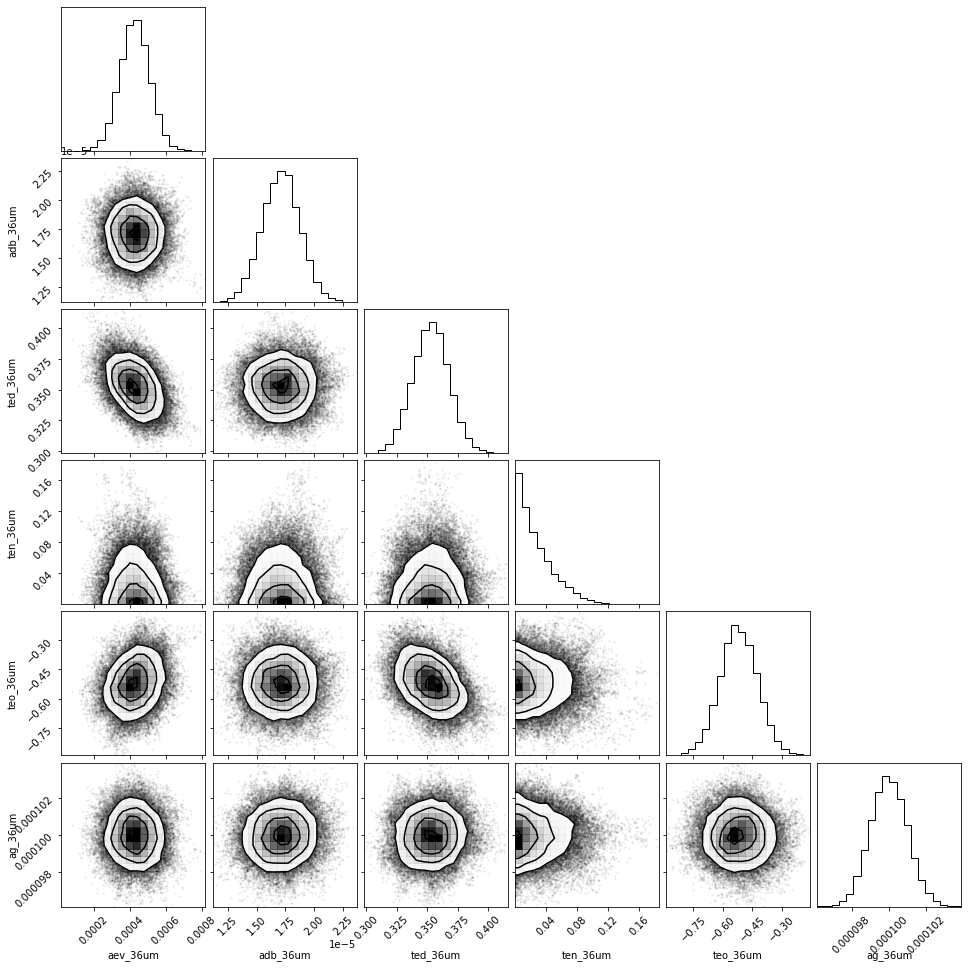

In [16]:
corner(df.iloc[:,26:32]);

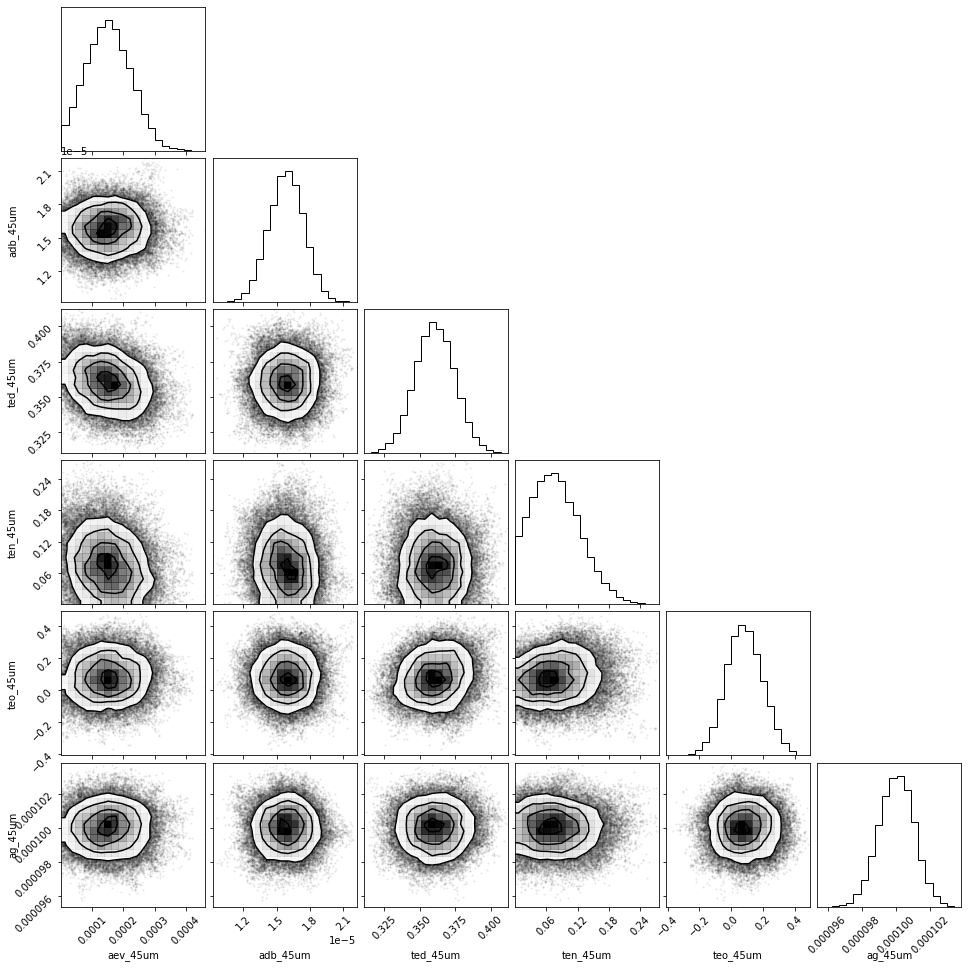

In [17]:
corner(df.iloc[:,32:38]);

---

<center>&copy 2021 Hannu Parviainen</center>